In [46]:
from plotly.offline import iplot
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.pyplot import figure
import plotly.express as px
import pandas as pd
import numpy as np
from os import walk
from tqdm.auto import tqdm
from datetime import datetime
import seaborn as sn
from sklearn.cluster import KMeans

In [47]:
train_df = pd.read_csv("./aggregated_data/labeled_5s_candles.csv")
train_df.drop(["Unnamed: 0"], axis=1, inplace=True)
train_df.dropna(inplace=True)
train_df

,timestamp,open,high,low,close,volume,score
12,2021-02-27 15:08:55,1483.68,1483.92,1483.56,1483.56,8.40117,-0.956559
13,2021-02-27 15:09:00,1483.27,1483.28,1483.11,1483.11,1.92292,-1.064994
14,2021-02-27 15:09:05,1482.49,1482.49,1482.16,1482.19,3.57305,-1.053513
15,2021-02-27 15:09:10,1482.36,1482.73,1482.22,1482.73,2.02586,-0.954966
16,2021-02-27 15:09:15,1482.60,1483.39,1482.51,1483.39,1.71675,-0.859152
...,...,...,...,...,...,...,...
34318,2021-03-01 14:26:00,1530.01,1530.49,1530.00,1530.49,15.21124,-0.521830
34319,2021-03-01 14:26:05,1530.42,1530.42,1530.01,1530.08,3.90970,-0.378777
34320,2021-03-01 14:26:10,1530.00,1530.25,1530.00,1530.25,11.90400,-0.241758
34321,2021-03-01 14:26:15,1530.56,1531.35,1530.56,1531.35,2.72905,-0.114336


In [48]:
kmeans = KMeans(algorithm='auto', init='k-means++', max_iter=1000,
    n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=42, tol=0.001, verbose=0)

train_df["class"]  = kmeans.fit_predict(train_df[['score']])

heights = train_df["class"].value_counts()/len(train_df["class"])
print(heights)
train_df["percs"] = train_df["class"].map(heights.to_dict())
train_df

/home/arathus/anaconda3/lib/python3.7/site-packages/sklearn/cluster/_kmeans.py:788: FutureWarning:

'precompute_distances' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25). It has no effect

/home/arathus/anaconda3/lib/python3.7/site-packages/sklearn/cluster/_kmeans.py:793: FutureWarning:

'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).



0    0.366734
4    0.280260
1    0.230276
2    0.070706
3    0.052024
Name: class, dtype: float64


,timestamp,open,high,low,close,volume,score,class,percs
12,2021-02-27 15:08:55,1483.68,1483.92,1483.56,1483.56,8.40117,-0.956559,4,0.280260
13,2021-02-27 15:09:00,1483.27,1483.28,1483.11,1483.11,1.92292,-1.064994,4,0.280260
14,2021-02-27 15:09:05,1482.49,1482.49,1482.16,1482.19,3.57305,-1.053513,4,0.280260
15,2021-02-27 15:09:10,1482.36,1482.73,1482.22,1482.73,2.02586,-0.954966,4,0.280260
16,2021-02-27 15:09:15,1482.60,1483.39,1482.51,1483.39,1.71675,-0.859152,4,0.280260
...,...,...,...,...,...,...,...,...,...
34318,2021-03-01 14:26:00,1530.01,1530.49,1530.00,1530.49,15.21124,-0.521830,4,0.280260
34319,2021-03-01 14:26:05,1530.42,1530.42,1530.01,1530.08,3.90970,-0.378777,4,0.280260
34320,2021-03-01 14:26:10,1530.00,1530.25,1530.00,1530.25,11.90400,-0.241758,0,0.366734
34321,2021-03-01 14:26:15,1530.56,1531.35,1530.56,1531.35,2.72905,-0.114336,0,0.366734


In [49]:
def relabel_df(train_df):
    relabel_dict = {
        1:3,
        4:1,
        2:0,
        3:4,
        0:2
    }
    train_df["class"] = train_df["class"].map(relabel_dict)
    
def relabel_prediction(array):
    relabel_dict = {
        1:3,
        4:1,
        2:0,
        3:4,
        0:2
    }
    return np.vectorize(relabel_dict.get)(array)

2    0.366734
1    0.280260
3    0.230276
0    0.070706
4    0.052024
Name: class, dtype: float64


Text(0.5, 0, 'Score values')

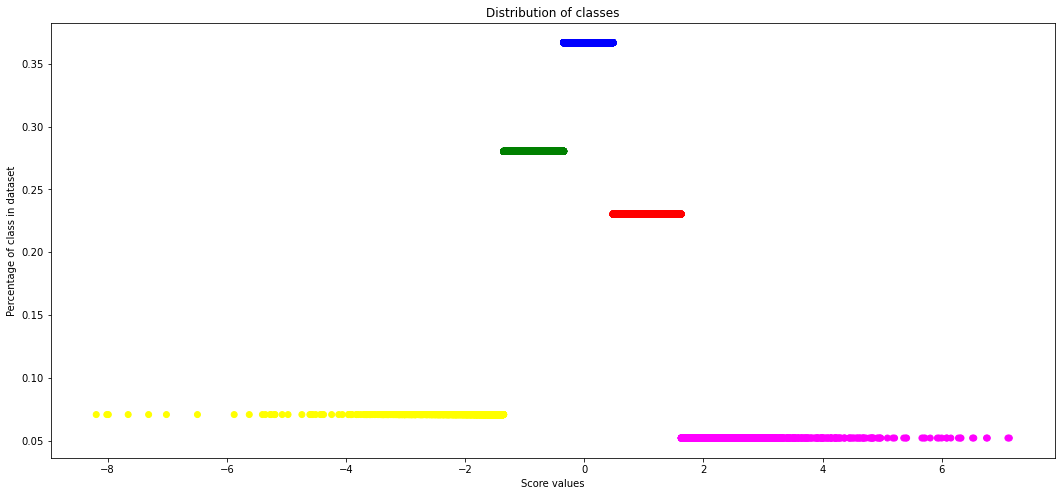

In [35]:
relabel_df(train_df)

heights = train_df["class"].value_counts()/len(train_df["class"])
print(heights)
ar = train_df["score"].values
y = train_df["percs"].values
label = train_df["class"].values

colors = ['yellow','green','blue', "red", "magenta"]

plt.figure(figsize=(18,8))
plt.scatter(ar, y + 0., c=label,cmap=matplotlib.colors.ListedColormap(colors))
plt.title('Distribution of classes')
plt.ylabel('Percentage of class in dataset')
plt.xlabel('Score values')

In [45]:
dl_train1 = train_df.copy()

params = np.array(dl_train1.drop(["score", "timestamp", "class", "percs"], axis=1).values)
all_arr = list()
for i in tqdm(range(13, len(params))):
    all_arr.append((params[i-12:i]/params[i-13])-1)
    
x = np.array(all_arr)

_y = np.array(dl_train1[["class"]].values)

y = _y

x = x
y = y[13:]

print(np.shape(x))
print(np.shape(y))

  0%|          | 0/34298 [00:00<?, ?it/s]

(34298, 12, 5)
(34298, 1)


In [44]:
# random shuffle
import random
from sklearn.model_selection import train_test_split

random.seed(42)

concat = list(zip(x,y))
random.shuffle(concat)

x, y = zip(*concat)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.1, random_state = 42)
X_train, X_test, y_train, y_test = np.array(X_train), np.array(X_test), np.array(y_train), np.array(y_test)

## one-hot encoding
a = y_train.reshape(-1)
b = np.zeros((a.size, a.max()+1))
b[np.arange(a.size),a] = 1
y_train = b

a = y_test.reshape(-1)
b = np.zeros((a.size, a.max()+1))
b[np.arange(a.size),a] = 1
y_test = b

In [38]:
from tensorflow.keras.layers import Dense, Lambda, Dot, Activation, Concatenate
from tensorflow.keras.layers import Layer

# special thanks to Philippe Rémy for the imlementation of the Dot-Product Attention in Keras framework
# https://github.com/philipperemy/keras-attention-mechanism/blob/master/attention/attention.py

class Attention(Layer):

    def __init__(self, units=128, **kwargs):
        self.units = units
        super().__init__(**kwargs)

    def __call__(self, inputs):

        hidden_states = inputs
        hidden_size = int(hidden_states.shape[2])

        score_first_part = Dense(hidden_size, use_bias=False, name='attention_score_vec')(hidden_states)

        h_t = Lambda(lambda x: x[:, -1, :], output_shape=(hidden_size,), name='last_hidden_state')(hidden_states)
        score = Dot(axes=[1, 2], name='attention_score')([h_t, score_first_part])
        attention_weights = Activation('softmax', name='attention_weight')(score)
        context_vector = Dot(axes=[1, 1], name='context_vector')([hidden_states, attention_weights])
        pre_activation = Concatenate(name='attention_output')([context_vector, h_t])
        attention_vector = Dense(self.units, use_bias=False, activation='tanh', name='attention_vector')(pre_activation)
        return attention_vector

    def get_config(self):
        return {'units': self.units}

    @classmethod
    def from_config(cls, config):
        return cls(**config)

### LSTM FCN with OHLC (+ Volume)

In [8]:
from keras.models import Sequential
from tensorflow.keras.layers import Input, LSTM, Dense, Dropout, Flatten, BatchNormalization, Reshape
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers import GlobalAveragePooling1D
from tensorflow.keras.callbacks import ModelCheckpoint
from keras.layers import LeakyReLU
from keras.layers.merge import concatenate
from keras.models import Model
from keras.optimizers import Adam

In [10]:
def FCN_head():
    input1 = Input(shape=(12, 5))
    
    
    fcn = Conv1D(8, 3)(input1)
    fcn = Dropout(0.1)(fcn)
    fcn = BatchNormalization()(fcn)
    fcn = LeakyReLU(0.15)(fcn)
    
    fcn = Conv1D(12, 5)(fcn)
    fcn = Dropout(0.1)(fcn)
    fcn = BatchNormalization()(fcn)
    fcn = LeakyReLU(0.15)(fcn)
    
    fcn = Conv1D(8, 4)(fcn)
    fcn = Dropout(0.1)(fcn)
    fcn = BatchNormalization()(fcn)
    fcn = LeakyReLU(0.15)(fcn)
    
    fcn = GlobalAveragePooling1D()(fcn)
    fcn = Flatten()(fcn)
    
    return input1, fcn

def LSTM_head():
    input2 = Input(shape=(12, 5))
    #alstm = Reshape((60, 1))(input2)
    alstm = LSTM(units = 80, return_sequences=True)(input2)
    alstm = Attention(20)(alstm)
    alstm = Dropout(0.1)(alstm)
    return input2, alstm

In [11]:
input_1, fcn = FCN_head()
input_2, alstm = LSTM_head()

merge = concatenate([fcn, alstm])

dense1 = Dense(100)(merge)
activ = LeakyReLU(alpha=0.1)(dense1)
output = Dense(units = 5, activation='softmax')(activ)

model = Model(inputs=[input_1, input_2], outputs=output)
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 12, 5)]      0                                            
__________________________________________________________________________________________________
conv1d (Conv1D)                 (None, 10, 8)        128         input_1[0][0]                    
__________________________________________________________________________________________________
dropout (Dropout)               (None, 10, 8)        0           conv1d[0][0]                     
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 10, 8)        32          dropout[0][0]                    
______________________________________________________________________________________________

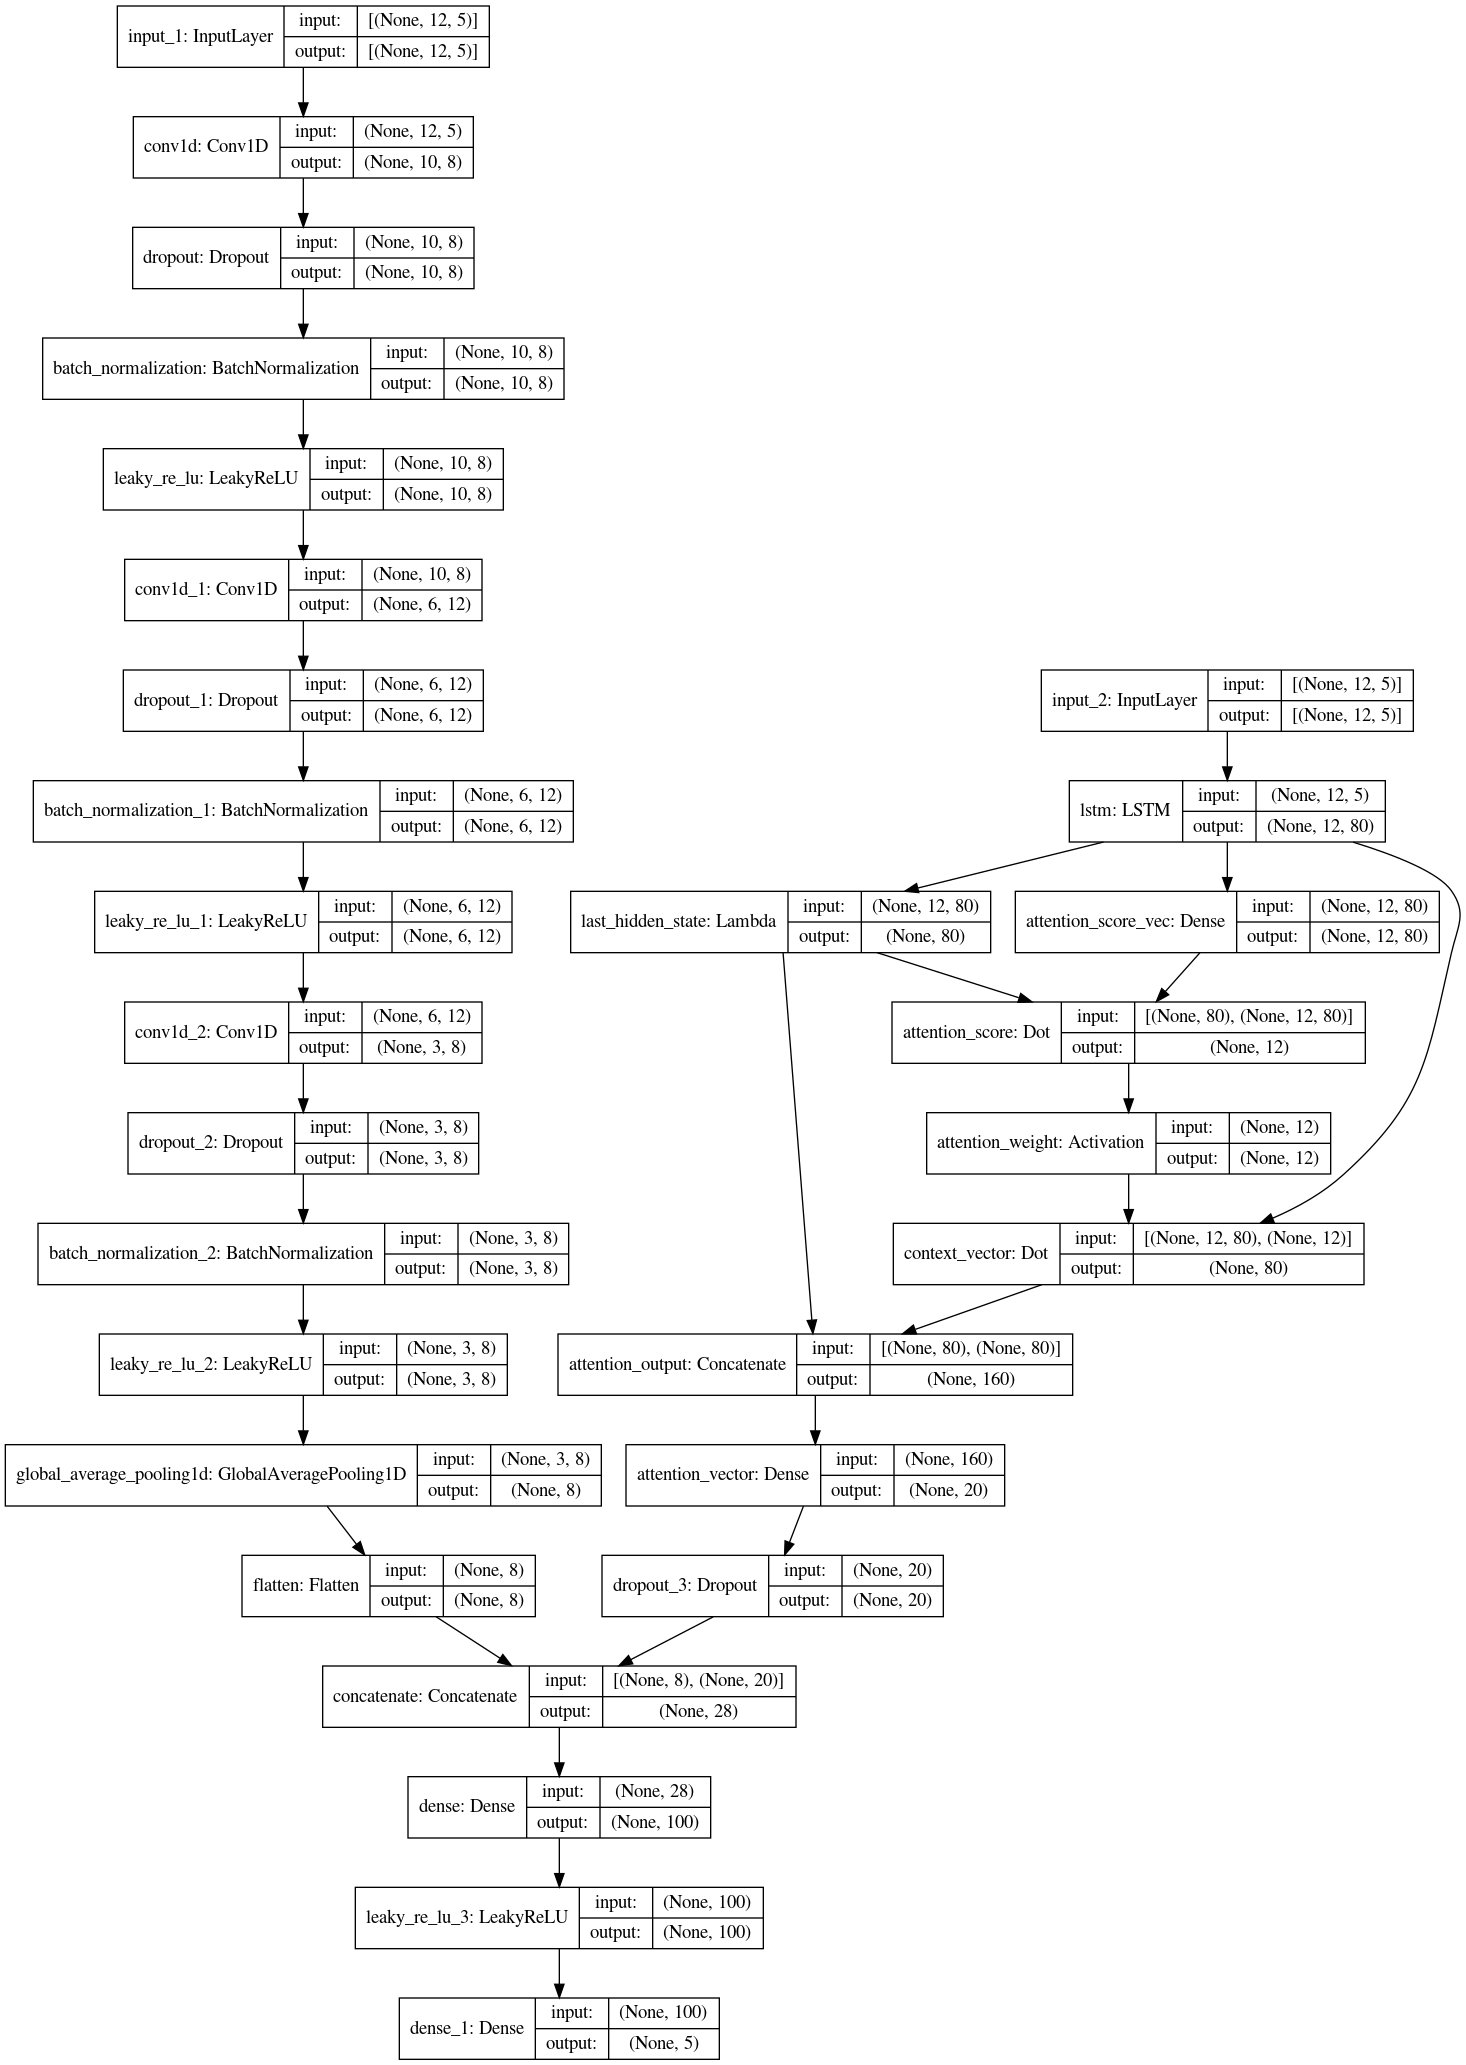

In [12]:
import tensorflow as tf
tf.keras.utils.plot_model(model, to_file="./images/lstm_fcn.png", show_shapes=True)

In [13]:
opt = Adam(learning_rate=0.00025)

model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
checkpoint_filepath = './tmp/lstm_fcn_01'

model_checkpoint_callback = ModelCheckpoint(
    filepath = checkpoint_filepath,
    save_weights_only = True,
    monitor = 'val_accuracy',
    mode = 'max',
    save_best_only = True)


cutpoint = -int(len(X_train)*0.2)

r = model.fit([X_train[:cutpoint], X_train[:cutpoint]],
              y_train[:cutpoint],
              validation_data=([X_test[cutpoint:], X_test[cutpoint:]], y_test[cutpoint:]), 
              epochs = 40,
              batch_size = 50, 
              callbacks=[model_checkpoint_callback])

model.load_weights(checkpoint_filepath)
model.save('./models/lstm_fcn_01')

Epoch 1/40
494/494 [==============================] - 55s 83ms/step - loss: 1.4805 - accuracy: 0.3397 - val_loss: 1.4060 - val_accuracy: 0.3776
Epoch 2/40
494/494 [==============================] - 38s 77ms/step - loss: 1.4059 - accuracy: 0.3631 - val_loss: 1.4145 - val_accuracy: 0.3784
Epoch 3/40
494/494 [==============================] - 40s 81ms/step - loss: 1.3964 - accuracy: 0.3725 - val_loss: 1.4213 - val_accuracy: 0.3790
Epoch 4/40
494/494 [==============================] - 40s 81ms/step - loss: 1.3984 - accuracy: 0.3688 - val_loss: 1.4137 - val_accuracy: 0.3781
Epoch 5/40
494/494 [==============================] - 39s 80ms/step - loss: 1.3838 - accuracy: 0.3712 - val_loss: 1.3255 - val_accuracy: 0.4134
Epoch 6/40
494/494 [==============================] - 38s 78ms/step - loss: 1.2758 - accuracy: 0.4178 - val_loss: 1.1891 - val_accuracy: 0.4732
Epoch 7/40
494/494 [==============================] - 40s 80ms/step - loss: 1.0362 - accuracy: 0.5408 - val_loss: 0.9423 - val_accuracy:

INFO:tensorflow:Assets written to: ./models/lstm_fcn_01/assets


INFO:tensorflow:Assets written to: ./models/lstm_fcn_01/assets


Overall accuracy:  0.8064139941690962 

class 0 accuracy: 68.8312 %
class 1 accuracy: 80.2548 %
class 2 accuracy: 85.1424 %
class 3 accuracy: 78.7371 %
class 4 accuracy: 73.6264 %


<AxesSubplot:>

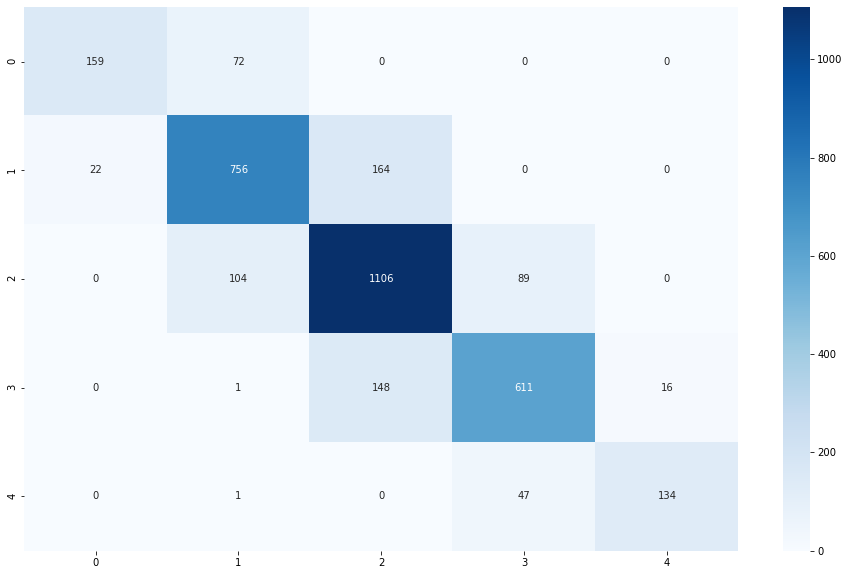

In [14]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from tensorflow import keras

model = keras.models.load_model('./models/lstm_fcn_01')

y_pred_2 = model.predict([X_test, X_test])

print("Overall accuracy: ",
      accuracy_score(relabel_prediction(y_test.argmax(axis=1)), relabel_prediction(y_pred_2.argmax(axis=1))), "\n")

matrix = confusion_matrix(y_test.argmax(axis=1), y_pred_2.argmax(axis=1))

class_percentages = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]
for idx, pct in enumerate(class_percentages.diagonal()):
    print(f"class {idx} accuracy:", "{:.4f} %".format(pct*100))

df_cm = pd.DataFrame(matrix, index = [str(i) for i in range(5)],
                  columns = [str(i) for i in range(5)])
plt.figure(figsize = (16,10))
sn.heatmap(df_cm, annot=True, cmap='Blues', fmt='g')

### LSTM FCN with OHLC (+ Volume) + Trades

In [22]:
dl_train2 = train_df.copy()

trades_df = pd.read_csv("./aggregated_data/5s_trades_all.csv")
trades_df.drop(["Unnamed: 0"], axis=1, inplace=True)

dl_train2 = pd.merge(dl_train2, trades_df, on="timestamp")

dl_train2["sentiment"] = \
(dl_train2["sentiment_weighted_avg_price"]>=1).astype(int).replace(0, -1)

dl_train2["sentiment_weighted_avg_price"] = np.abs(dl_train2["sentiment_weighted_avg_price"])

def windowed_value(wind_13):
    first = wind_13[0][:-1]
    whole =  wind_13[1:,:-1]
    side_values = np.array([i[-1] for i in wind_13])[1:]
    regularized = (whole/first)-1
    return np.hstack((regularized, side_values.reshape(-1,1)))


params = np.array(dl_train2.drop(["score", "timestamp", "class", "percs"], axis=1).values)
all_arr = list()
for i in tqdm(range(13, len(params))):
    all_arr.append(windowed_value(params[i-13:i]))

x = np.array(all_arr)

_y = np.array(dl_train2[["class"]].values)

y = _y

x = x
y = y[13:]

print(np.shape(x))
print(np.shape(y))

  0%|          | 0/34620 [00:00<?, ?it/s]

(34620, 12, 9)
(34620, 1)


In [23]:
# random shuffle
import random
from sklearn.model_selection import train_test_split

random.seed(42)

concat = list(zip(x,y))
random.shuffle(concat)

x, y = zip(*concat)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.1, random_state = 42)
X_train, X_test, y_train, y_test = np.array(X_train), np.array(X_test), np.array(y_train), np.array(y_test)

## one-hot encoding
a = y_train.reshape(-1)
b = np.zeros((a.size, a.max()+1))
b[np.arange(a.size),a] = 1
y_train = b

a = y_test.reshape(-1)
b = np.zeros((a.size, a.max()+1))
b[np.arange(a.size),a] = 1
y_test = b

### Model

In [17]:
def FCN_head():
    input1 = Input(shape=(12, 9))
    
    fcn = Conv1D(12, 3)(input1)
    fcn = Dropout(0.1)(fcn)
    fcn = BatchNormalization()(fcn)
    fcn = LeakyReLU(0.15)(fcn)
    
    fcn = Conv1D(32, 5)(fcn)
    fcn = Dropout(0.1)(fcn)
    fcn = BatchNormalization()(fcn)
    fcn = LeakyReLU(0.15)(fcn)
    
    fcn = Conv1D(16, 4)(fcn)
    fcn = Dropout(0.1)(fcn)
    fcn = BatchNormalization()(fcn)
    fcn = LeakyReLU(0.05)(fcn)
    
    fcn = GlobalAveragePooling1D()(fcn)
    fcn = Flatten()(fcn)
    
    return input1, fcn

def LSTM_head():
    input2 = Input(shape=(12, 9))
    #alstm = Reshape((60, 1))(input2)
    alstm = LSTM(units = 100, return_sequences=True)(input2)
    alstm = Attention(32)(alstm)
    alstm = Dropout(0.1)(alstm)
    return input2, alstm

In [18]:
input_1, fcn = FCN_head()
input_2, alstm = LSTM_head()

merge = concatenate([fcn, alstm])

dense1 = Dense(120)(merge)
activ = LeakyReLU(alpha=0.1)(dense1)
output = Dense(units = 5, activation='softmax')(activ)

model = Model(inputs=[input_1, input_2], outputs=output)
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 12, 9)]      0                                            
__________________________________________________________________________________________________
conv1d_3 (Conv1D)               (None, 10, 12)       336         input_3[0][0]                    
__________________________________________________________________________________________________
dropout_4 (Dropout)             (None, 10, 12)       0           conv1d_3[0][0]                   
__________________________________________________________________________________________________
batch_normalization_3 (BatchNor (None, 10, 12)       48          dropout_4[0][0]                  
____________________________________________________________________________________________

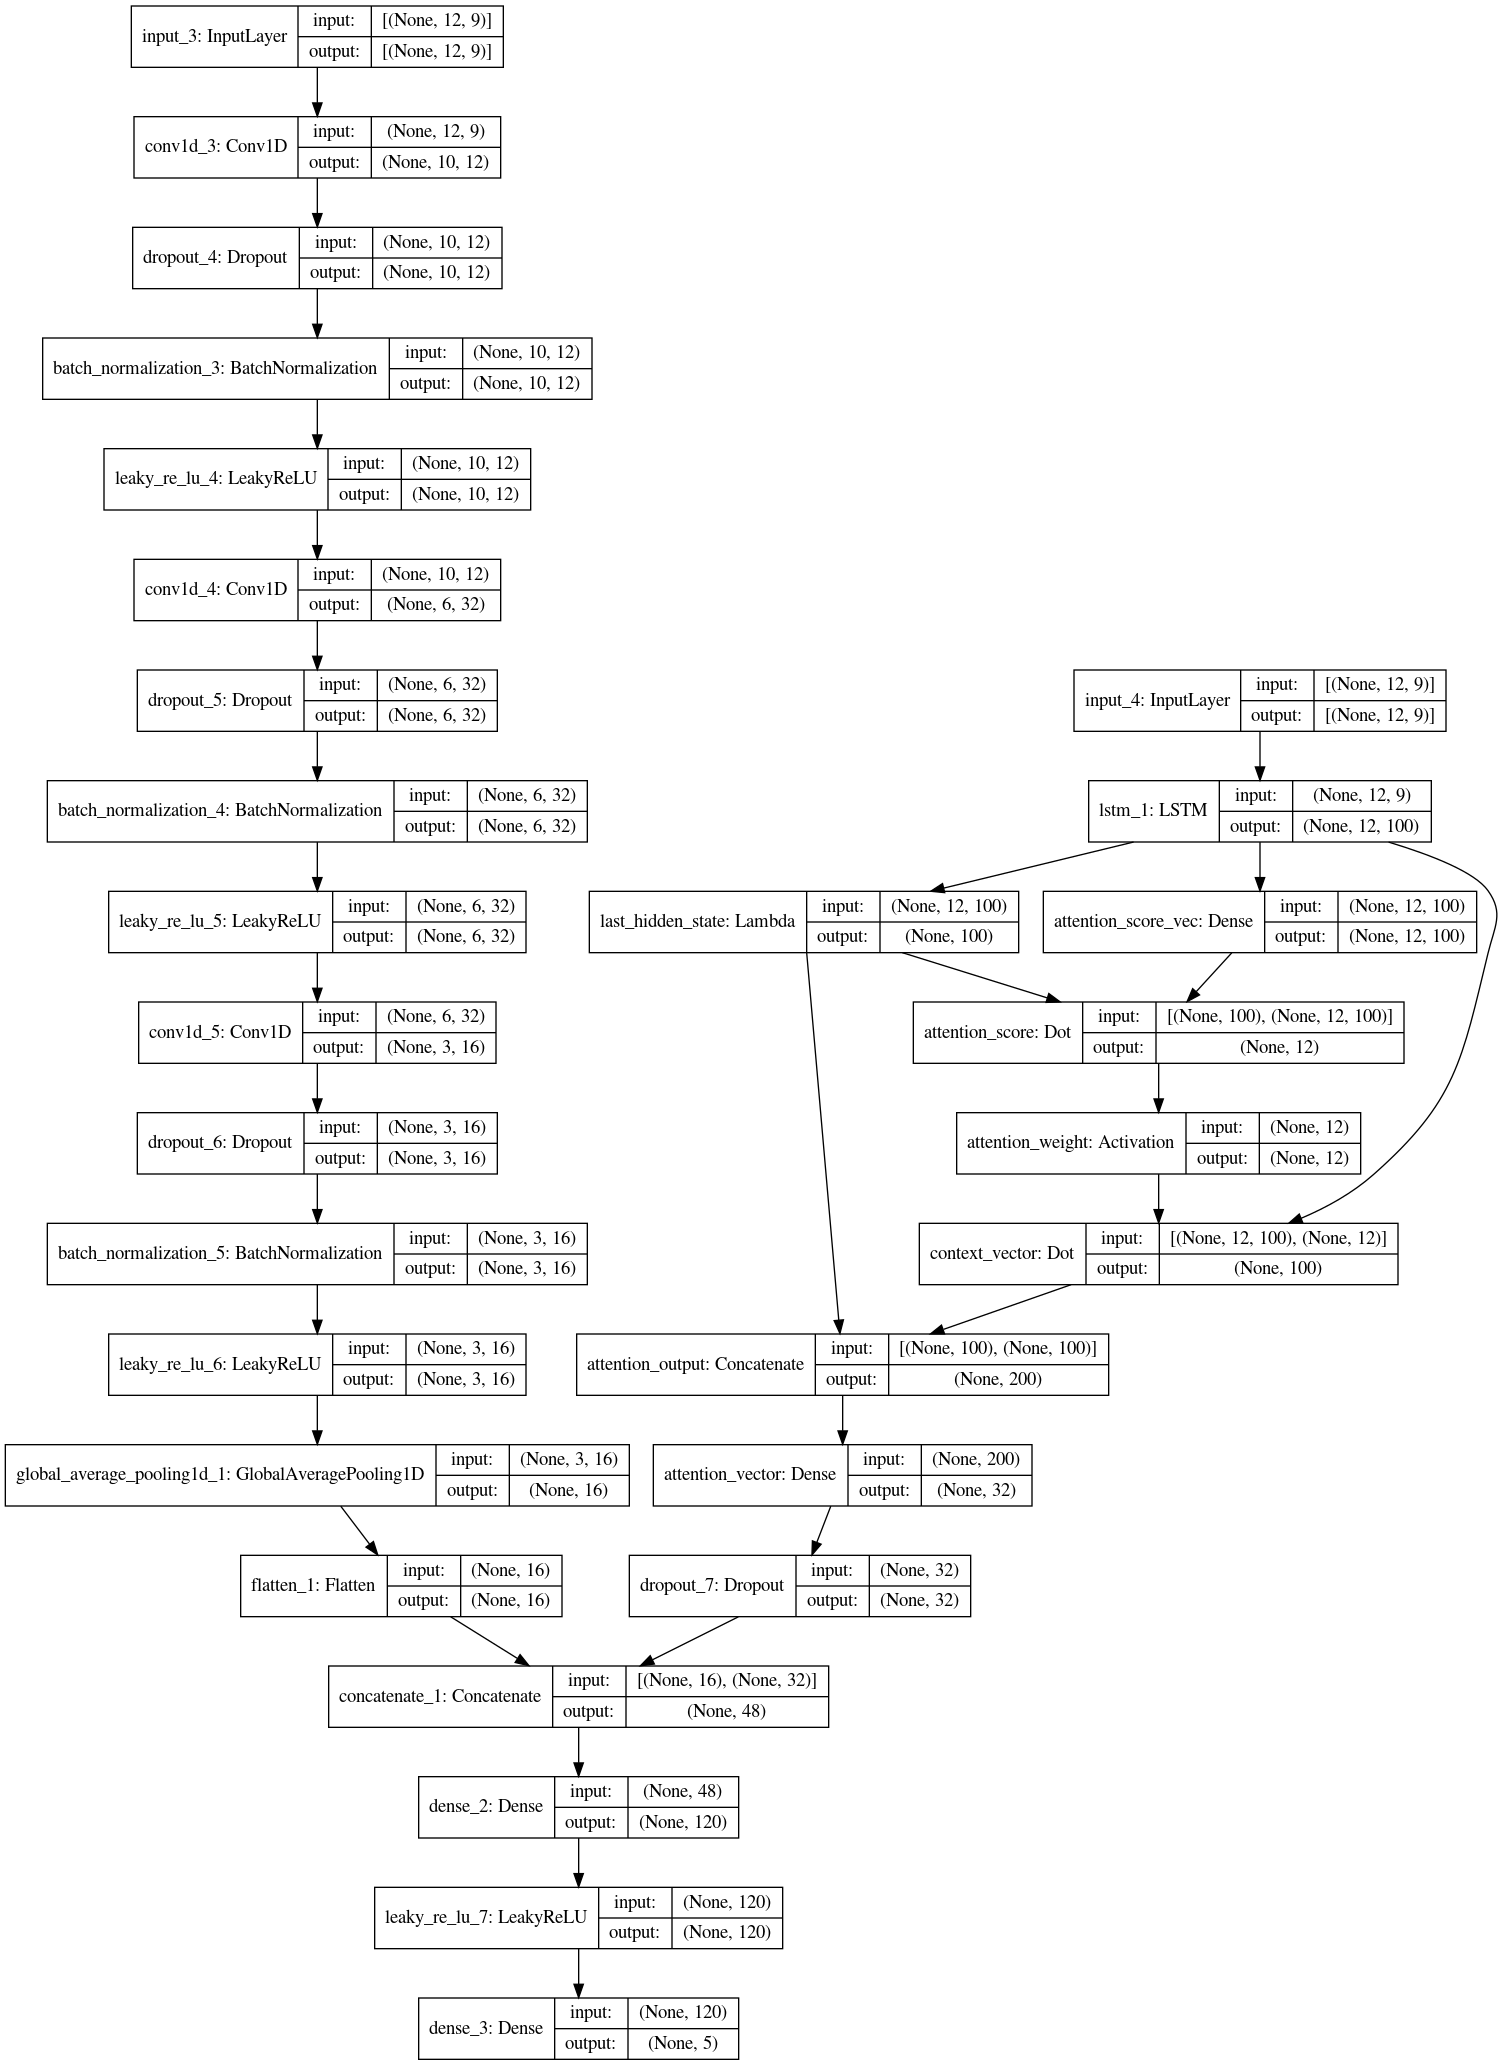

In [19]:
import tensorflow as tf
tf.keras.utils.plot_model(model, to_file="./images/lstm_fcn_02.png", show_shapes=True)

In [20]:
opt = Adam(learning_rate=0.00025)

model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
checkpoint_filepath = './tmp/lstm_fcn_02'

model_checkpoint_callback = ModelCheckpoint(
    filepath = checkpoint_filepath,
    save_weights_only = True,
    monitor = 'val_accuracy',
    mode = 'max',
    save_best_only = True)


cutpoint = -int(len(X_train)*0.2)

r = model.fit([X_train[:cutpoint], X_train[:cutpoint]],
              y_train[:cutpoint],
              validation_data=([X_test[cutpoint:], X_test[cutpoint:]], y_test[cutpoint:]), 
              epochs = 40,
              batch_size = 50, 
              callbacks=[model_checkpoint_callback])

model.load_weights(checkpoint_filepath)
model.save('./models/lstm_fcn_02')

Epoch 1/40
499/499 [==============================] - 63s 99ms/step - loss: 1.4634 - accuracy: 0.3355 - val_loss: 1.3854 - val_accuracy: 0.3709
Epoch 2/40
499/499 [==============================] - 52s 104ms/step - loss: 1.3799 - accuracy: 0.3738 - val_loss: 1.3743 - val_accuracy: 0.3689
Epoch 3/40
499/499 [==============================] - 54s 108ms/step - loss: 1.3681 - accuracy: 0.3777 - val_loss: 1.3572 - val_accuracy: 0.3772
Epoch 4/40
499/499 [==============================] - 51s 102ms/step - loss: 1.3395 - accuracy: 0.3945 - val_loss: 1.2889 - val_accuracy: 0.4255
Epoch 5/40
499/499 [==============================] - 51s 103ms/step - loss: 1.2679 - accuracy: 0.4233 - val_loss: 1.1651 - val_accuracy: 0.4769
Epoch 6/40
499/499 [==============================] - 51s 102ms/step - loss: 1.1348 - accuracy: 0.4952 - val_loss: 1.0359 - val_accuracy: 0.5479
Epoch 7/40
499/499 [==============================] - 60s 120ms/step - loss: 0.9686 - accuracy: 0.5685 - val_loss: 0.8416 - val_acc

INFO:tensorflow:Assets written to: ./models/lstm_fcn_02/assets


INFO:tensorflow:Assets written to: ./models/lstm_fcn_02/assets


Overall accuracy:  0.791161178509532 

class 0 accuracy: 65.8120 %
class 1 accuracy: 80.6452 %
class 2 accuracy: 79.6716 %
class 3 accuracy: 81.5136 %
class 4 accuracy: 73.6264 %


<AxesSubplot:>

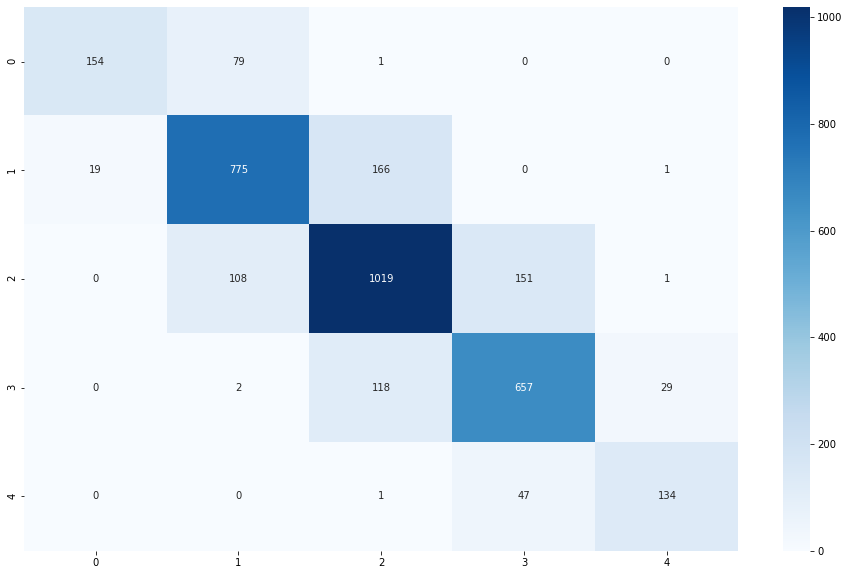

In [25]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from tensorflow import keras

model = keras.models.load_model('./models/lstm_fcn_02')

y_pred_2 = model.predict([X_test, X_test])

print("Overall accuracy: ",
      accuracy_score(relabel_prediction(y_test.argmax(axis=1)), relabel_prediction(y_pred_2.argmax(axis=1))), "\n")

matrix = confusion_matrix(y_test.argmax(axis=1), y_pred_2.argmax(axis=1))

class_percentages = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]
for idx, pct in enumerate(class_percentages.diagonal()):
    print(f"class {idx} accuracy:", "{:.4f} %".format(pct*100))

df_cm = pd.DataFrame(matrix, index = [str(i) for i in range(5)],
                  columns = [str(i) for i in range(5)])
plt.figure(figsize = (16,10))
sn.heatmap(df_cm, annot=True, cmap='Blues', fmt='g')